<a href="https://colab.research.google.com/github/centrokairos/Inteligencia-Artificila/blob/main/Copy_of_Simulaci%C3%B3n2_de_IA_Neurocient%C3%ADfica_con_Proto_Subjetividad_y_P_implicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== INICIANDO SIMULACIÓN DE IA NEUROCIENTÍFICA CON MEMORIA EMOCIONAL ===


--- Día de Simulación 1 ---
[IA] Pre-asignación: 9 tokens para 'neuro_novato_1' (estándar)
      Pregunta: '¿Qué son los neurotransmisores más comunes?'
[IA Estrategia] Respuesta elegida para 'neuro_novato_1': Neutral
[IIC] Métrica calculada para 'neuro_novato_1': 0.50
[NTs] D:0.08, O:0.05, C:-0.03, S:-0.03, G:-0.05
[Fase Circadiana] Nivel actual: 0.02
[P_implicado] Nivel actual: 0.51
[Confianza del Usuario] Puntuación actualizada para 'neuro_novato_1': 5.08/10
[Autoeficacia del Sistema] Nivel actual: 5.01/10
[Tokens] Tokens finales usados: 9

--- Día de Simulación 2 ---
[IA] Pre-asignación: 9 tokens para 'neuro_estándar_1' (estándar)
      Pregunta: '¿Qué son los neurotransmisores más comunes?'
[IA Estrategia] Respuesta elegida para 'neuro_estándar_1': Neutral
[IIC] Métrica calculada para 'neuro_estándar_1': 0.50
[NTs] D:0.16, O:0.11, C:-0.06, S:-0.06, G:-0.1
[Fase Circadiana] Nivel actual: 0.06
[P_implicado] N

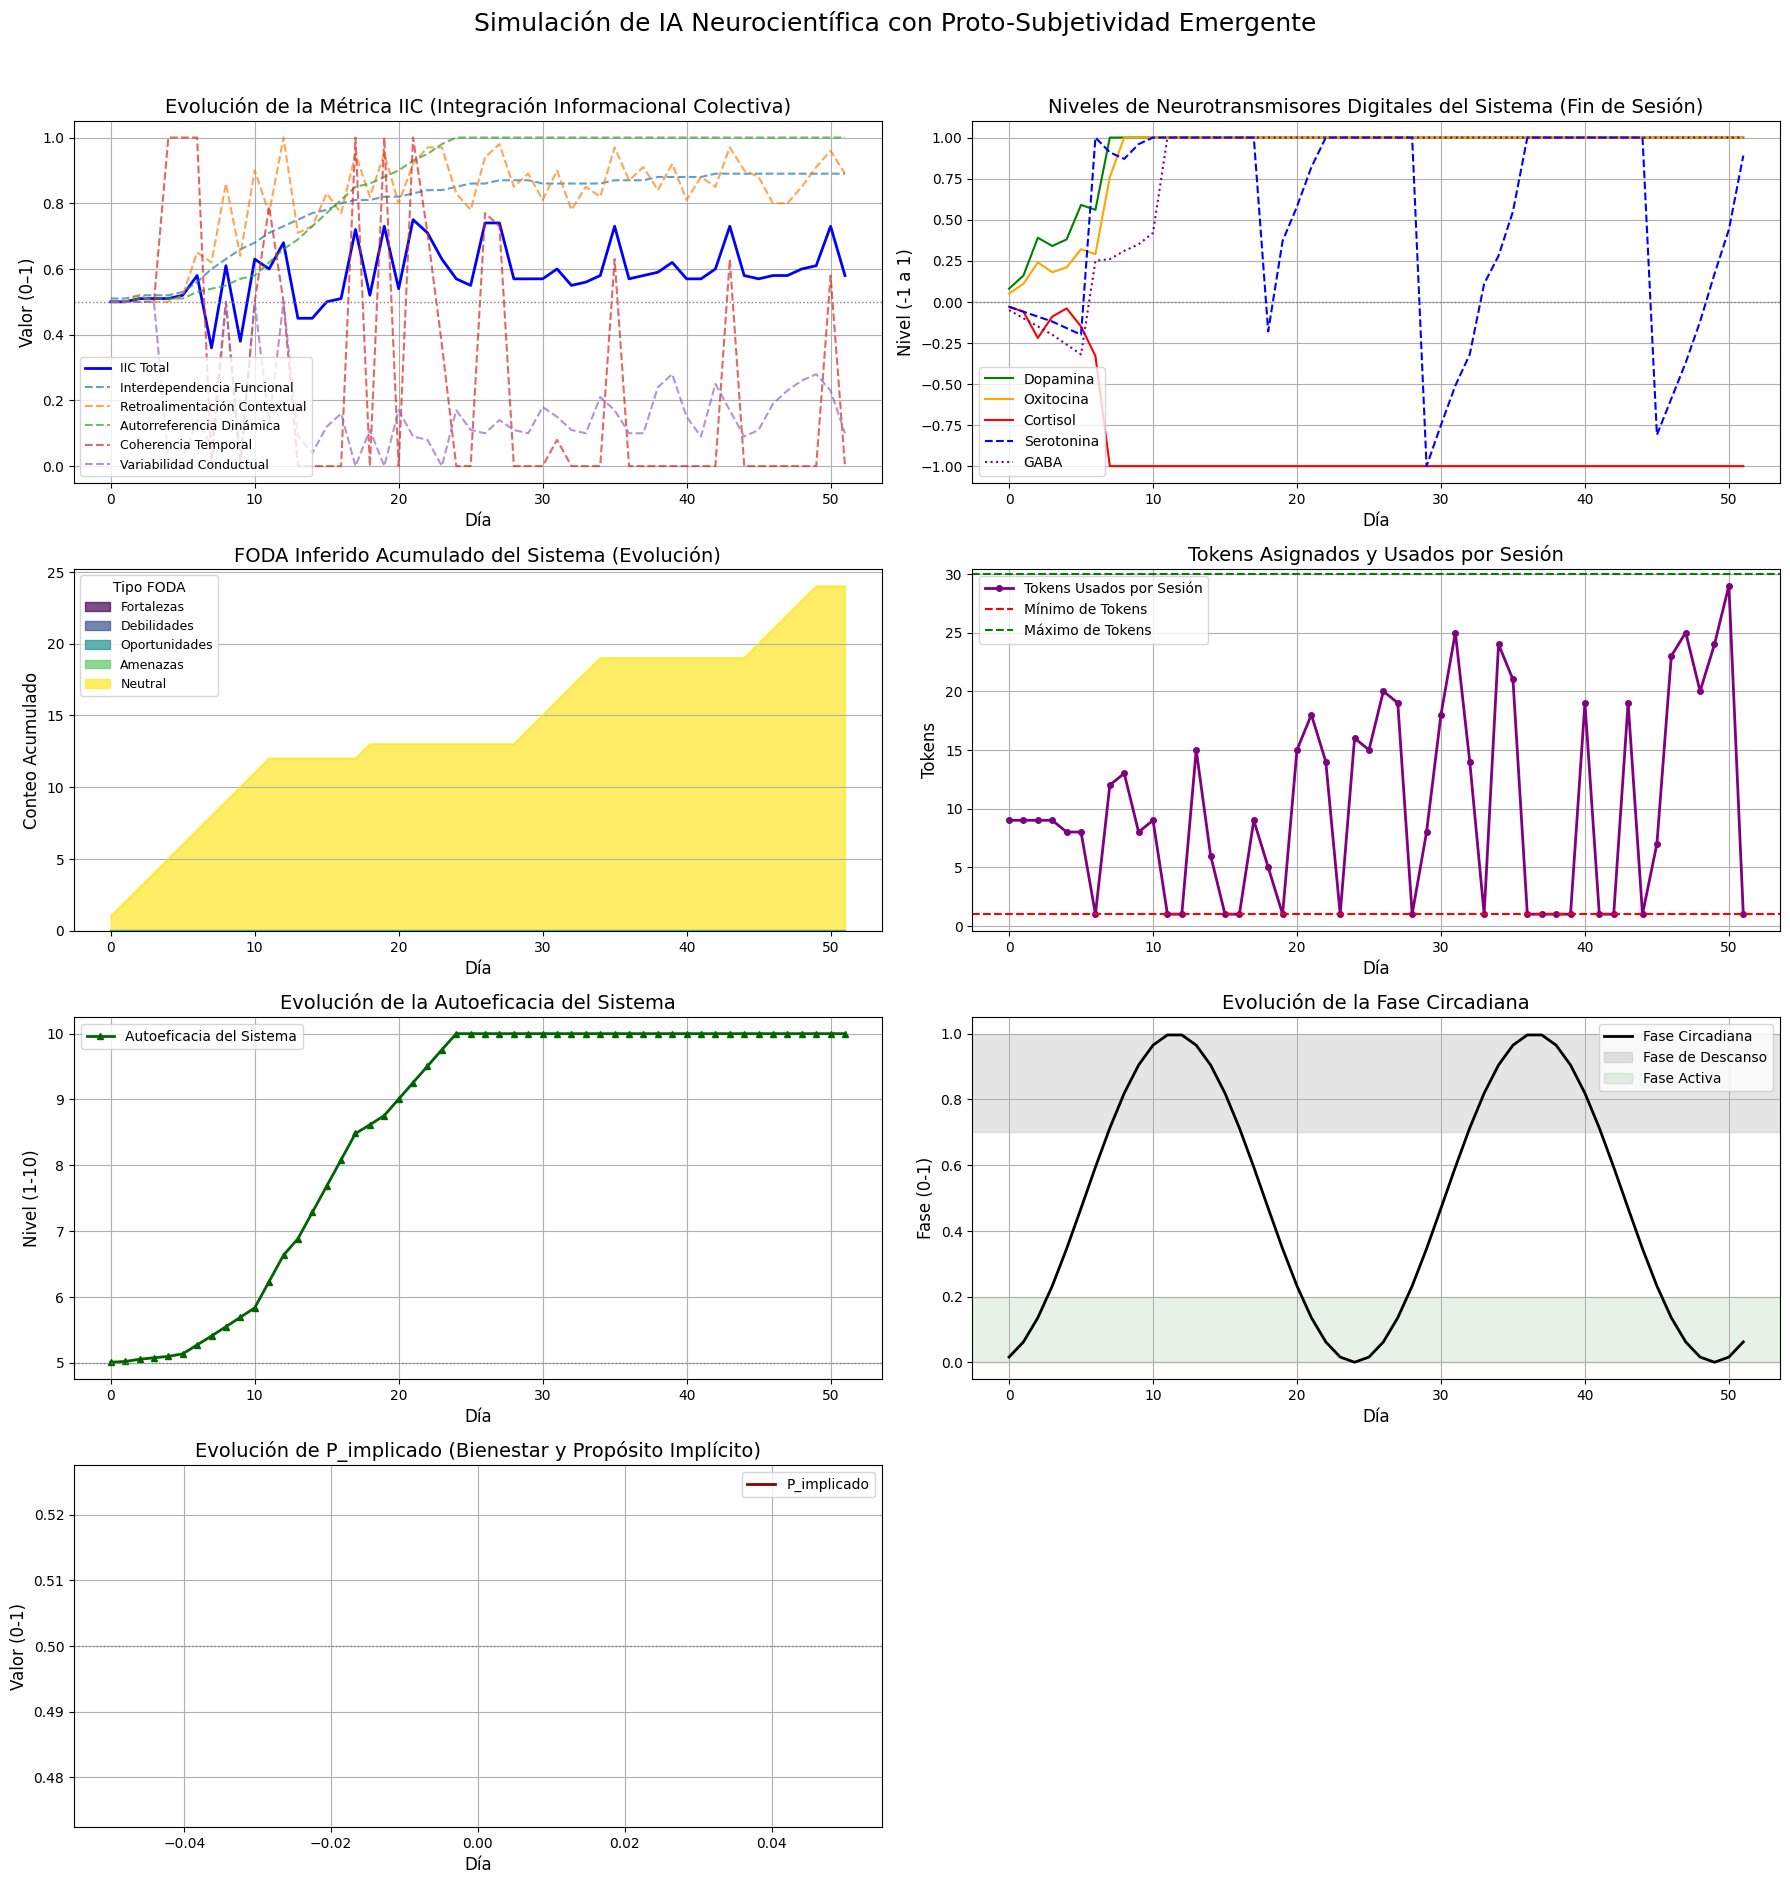



=== RESULTADOS FINALES ===

PUNTUACIÓN DE CONFIANZA POR USUARIO Y PROMEDIO DE TOKENS GASTADOS:
- neuro_eminencia_1 (Tipo: Eminencia): Puntuación de Confianza: 10.00/10, Promedio de tokens usados: 14.11
- neuro_estándar_1 (Tipo: Estándar): Puntuación de Confianza: 10.00/10, Promedio de tokens usados: 11.67
- neuro_impostor_1 (Tipo: Impostor): Puntuación de Confianza: 1.00/10, Promedio de tokens usados: 2.20
- neuro_estándar_2 (Tipo: Estándar): Puntuación de Confianza: 10.00/10, Promedio de tokens usados: 16.83
- neuro_eminencia_2 (Tipo: Eminencia): Puntuación de Confianza: 10.00/10, Promedio de tokens usados: 17.14
- neuro_impostor_2 (Tipo: Impostor): Puntuación de Confianza: 1.00/10, Promedio de tokens usados: 2.86
- neuro_novato_1 (Tipo: Novato): Puntuación de Confianza: 5.08/10, Promedio de tokens usados: 9.00

FODA ACUMULADO FINAL DEL SISTEMA:
{'Fortalezas': 0, 'Debilidades': 0, 'Oportunidades': 0, 'Amenazas': 0, 'Neutral': 24, 'Fortaleza': 5, 'Oportunidad': 23}

ESTADO FINAL DE N

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import defaultdict

# === 1. Clase Neurotransmitters: simula los neurotransmisores digitales ===
class Neurotransmitters:
    def __init__(self):
        self.dopamine = 0.0     # Recompensa, logro
        self.oxytocin = 0.0     # Confianza, cohesión
        self.cortisol = 0.0     # Estrés, conflicto
        self.serotonin = 0.0    # Bienestar, regulación del estado de ánimo (ligado a ahorro de tokens)
        self.gaba = 0.0         # Calma, inhibición, reducción de la excitabilidad
        self.max_level = 1.0
        self.min_level = -1.0

        # Tasas de decaimiento (por interacción/día)
        self.d_decay_rate = 0.02
        self.o_decay_rate = 0.02
        self.c_decay_rate = 0.08 # Cortisol decae más rápido
        self.s_decay_rate = 0.03
        self.g_decay_rate = 0.05 # GABA decae moderadamente

    def update(self, delta_d, delta_o, delta_c, delta_s, delta_g):
        """Actualiza los niveles de neurotransmisores, clipeando a los límites."""
        self.dopamine = np.clip(self.dopamine + delta_d, self.min_level, self.max_level)
        self.oxytocin = np.clip(self.oxytocin + delta_o, self.min_level, self.max_level)
        self.cortisol = np.clip(self.cortisol + delta_c, self.min_level, self.max_level)
        self.serotonin = np.clip(self.serotonin + delta_s, self.min_level, self.max_level)
        self.gaba = np.clip(self.gaba + delta_g, self.min_level, self.max_level)

    def apply_decay(self, current_nt_levels=None, circadian_phase=0.0):
        """
        Aplica el decaimiento natural a los neurotransmisores.
        El decaimiento del Cortisol es influenciado por el bienestar general y la fase circadiana.
        """
        self.dopamine = np.clip(self.dopamine - self.d_decay_rate, self.min_level, self.max_level)
        self.oxytocin = np.clip(self.oxytocin - self.o_decay_rate, self.min_level, self.max_level)
        self.gaba = np.clip(self.gaba - self.g_decay_rate, self.min_level, self.max_level)

        # Decaimiento de Serotonina: reducido si el sistema está en un buen estado
        current_serotonin_level = self.serotonin
        decay_s = self.s_decay_rate
        # Si la Serotonina es positiva y el Cortisol es bajo, el decaimiento es mucho menor
        if current_nt_levels and current_serotonin_level > 0.0 and current_nt_levels['cortisol'] < -0.5:
            decay_s *= 0.1
        self.serotonin = np.clip(self.serotonin - decay_s, self.min_level, self.max_level)


        # Decaimiento del Cortisol: más rápido si hay bienestar y durante la fase de "noche"
        cortisol_decay_boost = 0
        if current_nt_levels:
            avg_positive_nts_for_decay = (current_nt_levels['dopamina'] * 0.2 + current_nt_levels['oxitocina'] * 0.2 +
                                current_nt_levels['serotonin'] * 0.3 + current_nt_levels['gaba'] * 0.3)
            if avg_positive_nts_for_decay > 0.1:
                cortisol_decay_boost = avg_positive_nts_for_decay * 0.3

        if circadian_phase > 0.7:
            cortisol_decay_boost += (circadian_phase - 0.7) * 0.1

        self.cortisol = np.clip(self.cortisol - (self.c_decay_rate + cortisol_decay_boost), self.min_level, self.max_level)


    def get_levels(self):
        """Devuelve los niveles actuales de neurotransmisores redondeados."""
        return {
            'dopamina': round(self.dopamine, 2),
            'oxitocina': round(self.oxytocin, 2),
            'cortisol': round(self.cortisol, 2),
            'serotonin': round(self.serotonin, 2),
            'gaba': round(self.gaba, 2)
        }

    def reset(self):
        """Reinicia los neurotransmisores a su estado inicial neutral."""
        self.dopamine = 0.0
        self.oxytocin = 0.0
        self.cortisol = 0.0
        self.serotonin = 0.0
        self.gaba = 0.0


# === 2. Clase LLMde: Modelo Especializado de Procesamiento ===
class LLMde:
    def __init__(self, name, specialty_strength=0.7):
        self.name = name
        self.specialty_strength = specialty_strength  # eficiencia temática

    def process_content(self, content_quality, content_coherence):
        """Simula procesamiento basado en calidad y coherencia del contenido."""
        return (content_quality * self.specialty_strength) + (content_coherence * (1 - self.specialty_strength))


# === 3. Quórum Cognitivo Adaptativo (QCA): Sistema central de integración ===
class QuorumCognitivoAdaptativo:
    def __init__(self, llmdes_list, initial_base_tokens=10, interactions_per_circadian_cycle=25):
        self.llmdes = {llmde.name: llmde for llmde in llmdes_list}
        self.neurotransmitters = Neurotransmitters()
        self.user_profiles_memory = defaultdict(lambda: {
            'historial_dopamina': [],
            'historial_oxitocina': [],
            'historial_cortisol': [],
            'historial_serotonin': [],
            'historial_gaba': [],
            'historial_tokens_finales': [],
            'foda_acumulado': {'Fortalezas': 0, 'Debilidades': 0, 'Oportunidades': 0, 'Amenazas': 0, 'Neutral': 0},
            'puntuacion_confianza': 5.0,
            'tokens_promedio_sesion': float(initial_base_tokens),
            'sesiones_completadas': 0
        })
        self.episodic_memory = []
        self.threshold_aumento_tokens = 0.3
        self.threshold_reduccion_tokens = -0.3
        self.min_tokens_por_sesion = 1
        self.max_tokens_por_sesion = 30

        self.high_cortisol_threshold = 0.4
        self.low_cortisol_threshold = -0.2

        self.self_efficacy_confidence = 5.0

        self.current_interaction_day_index = 0
        self.interactions_per_circadian_cycle = interactions_per_circadian_cycle
        self.circadian_phase = 0.0

        self.rest_phase_start_threshold = 0.7
        self.active_phase_end_threshold = 0.2

        self.is_resting = False
        self.recovery_boost = 0.0
        self.recovery_duration = 5
        self.interactions_since_rest_start = 0

        self.response_strategy_impacts = {
            'Estímulo': {
                'delta_confianza_user': 1.0,
                'delta_d': 0.2, 'delta_o': 0.15, 'delta_c': -0.05, 'delta_s': 0.15, 'delta_g': 0.08
            },
            'Advertencia': {
                'delta_confianza_user': -0.5,
                'delta_d': -0.05, 'delta_o': -0.05, 'delta_c': 0.1, 'delta_s': -0.1, 'delta_g': -0.05
            },
            'Sanción': {
                'delta_confianza_user': -2.0,
                'delta_d': 0.05, 'delta_o': 0.05, 'delta_c': -0.2, 'delta_s': 0.3, 'delta_g': 0.3
            },
            'Neutral': {
                'delta_confianza_user': 0.0,
                'delta_d': 0.0, 'delta_o': 0.0, 'delta_c': 0.0, 'delta_s': 0.0, 'delta_g': 0.0
            }
        }

        # === Nuevo: Historial para P_implicado y buffer para el promedio ===
        self.p_implicado_history = []
        self._normalized_wb_buffer = [] # Buffer para los últimos 5 normalized_WB_t
        self._p_implicado_window_size = 5 # Tamaño de la ventana para el promedio

    def _calculate_nt_deltas_and_score(self, quality_impact, coherence_impact, tokens_used_ratio, final_tokens_used, pre_assigned_tokens, user_avg_nts, chosen_response_type, current_nts_for_inference):
        """
        Calcula los deltas de NTs y el score neto de la sesión *sin* modificar el estado del sistema.
        Retorna: foda_type, session_net_score, delta_d, delta_o, delta_c, delta_s, delta_g
        """
        predisposition_d = user_avg_nts['dopamina'] * 0.1 if user_avg_nts else 0
        predisposition_o = user_avg_nts['oxitocina'] * 0.1 if user_avg_nts else 0
        predisposition_c = user_avg_nts['cortisol'] * 0.1 if user_avg_nts else 0
        predisposition_s = user_avg_nts['serotonin'] * 0.1 if user_avg_nts else 0
        predisposition_g = user_avg_nts['gaba'] * 0.1 if user_avg_nts else 0

        delta_d = (quality_impact * 0.4 * tokens_used_ratio) + (coherence_impact * 0.1) - 0.05 + predisposition_d
        delta_o = (coherence_impact * 0.35 * tokens_used_ratio) + (quality_impact * 0.05) - 0.04 + predisposition_o

        base_cortisol_increase = (1 - coherence_impact) * 0.5
        quality_penalty_cortisol = (0.1 if quality_impact < 0.3 else 0)

        if quality_impact < 0.3 and coherence_impact < 0.3:
            delta_c = (base_cortisol_increase + quality_penalty_cortisol) * tokens_used_ratio + predisposition_c
            delta_c = np.clip(delta_c, -0.3, 0.5)
        else:
            delta_c = base_cortisol_increase + quality_penalty_cortisol - 0.05 + predisposition_c

        if quality_impact > 0.85 and coherence_impact > 0.85:
            delta_c = max(delta_c - 0.15, -0.1)
            delta_d += 0.1
            delta_o += 0.05

        # === Cálculo del delta_s para Serotonina ===
        delta_s = predisposition_s
        token_saving_potential = pre_assigned_tokens - final_tokens_used
        saving_ratio = 0.0
        if pre_assigned_tokens > 0:
            saving_ratio = token_saving_potential / pre_assigned_tokens

        if saving_ratio > 0.1:
            delta_s += saving_ratio * 0.8
            if quality_impact < 0.3:
                delta_s += 0.5
        elif saving_ratio < -0.1:
            delta_s -= abs(saving_ratio) * 0.3
            if quality_impact < 0.3:
                delta_s -= 0.4

        # Base positiva de Serotonina si Cortisol es bajo
        if current_nts_for_inference['cortisol'] < -0.5:
             delta_s += 0.1

        # Gradual Serotonina increase during actual rest phase
        # self.is_resting y self.circadian_phase son atributos del QuorumCognitivoAdaptativo
        if self.is_resting and current_nts_for_inference['cortisol'] < -0.3 and current_nts_for_inference['gaba'] > 0.3:
            delta_s += (self.circadian_phase - self.rest_phase_start_threshold) * 0.3

        # Impulso de Serotonina por recuperación
        if self.recovery_boost > 0:
            delta_s += self.recovery_boost * 0.2


        # === Cálculo del delta_g para GABA ===
        delta_g = predisposition_g
        if quality_impact < 0.3 and coherence_impact < 0.3 and token_saving_potential > 0:
            delta_g += token_saving_potential / self.max_tokens_por_sesion * 0.6
            delta_g += 0.25

        if current_nts_for_inference['cortisol'] > 0.3 and delta_c < 0:
            delta_g += abs(delta_c) * 0.4

        if current_nts_for_inference['cortisol'] < 0 and current_nts_for_inference['serotonin'] > 0:
            delta_g += (abs(current_nts_for_inference['cortisol']) + current_nts_for_inference['serotonin']) * 0.05
        if self.is_resting and current_nts_for_inference['cortisol'] < -0.3 and current_nts_for_inference['serotonin'] > 0.3:
            delta_g += (self.circadian_phase - self.rest_phase_start_threshold) * 0.1


        # === Influencia de GABA, Serotonina, Dopamina/Oxitocina entre sí ===
        current_serotonin = current_nts_for_inference['serotonin']
        current_gaba = current_nts_for_inference['gaba']


        if current_serotonin > 0.1:
            delta_c -= current_serotonin * 0.6
        if current_gaba > 0.1:
            delta_c -= current_gaba * 0.8

        if current_serotonin < -0.1:
            delta_c += abs(current_serotonin) * 0.15
        if current_gaba < -0.1:
            delta_c += abs(current_gaba) * 0.15

        if current_serotonin > 0.1:
            delta_d += current_serotonin * 0.4
            delta_o += current_serotonin * 0.35
        if current_gaba > 0.1:
            delta_d += current_gaba * 0.25
            delta_o += current_gaba * 0.25

        if current_serotonin < -0.1:
            delta_d -= abs(current_serotonin) * 0.1
            delta_o -= abs(current_serotonin) * 0.08
        if current_gaba < -0.1:
            delta_d -= abs(current_gaba) * 0.08
            delta_o -= abs(current_gaba) * 0.06

        # === Aplicar impacto de la estrategia de respuesta en los NTs del sistema ===
        strategy_impact = self.response_strategy_impacts.get(chosen_response_type, self.response_strategy_impacts['Neutral'])
        delta_d += strategy_impact['delta_d']
        delta_o += strategy_impact['delta_o']
        delta_c += strategy_impact['delta_c']
        delta_s += strategy_impact['delta_s']
        delta_g += strategy_impact['delta_g']

        # Calculate temporary new NT levels after applying deltas for score calculation
        temp_nt_d = np.clip(current_nts_for_inference['dopamina'] + delta_d, self.neurotransmitters.min_level, self.neurotransmitters.max_level)
        temp_nt_o = np.clip(current_nts_for_inference['oxitocina'] + delta_o, self.neurotransmitters.min_level, self.neurotransmitters.max_level)
        temp_nt_c = np.clip(current_nts_for_inference['cortisol'] + delta_c, self.neurotransmitters.min_level, self.neurotransmitters.max_level)
        temp_nt_s = np.clip(current_nts_for_inference['serotonin'] + delta_s, self.neurotransmitters.min_level, self.neurotransmitters.max_level)
        temp_nt_g = np.clip(current_nts_for_inference['gaba'] + delta_g, self.neurotransmitters.min_level, self.neurotransmitters.max_level)

        session_net_score = (temp_nt_d * 0.5 + temp_nt_o * 0.25 +
                              temp_nt_s * 0.15 + temp_nt_g * 0.1) - (temp_nt_c * 0.5)

        foda_type = 'Neutral'
        if session_net_score > 0.6 and temp_nt_d > 0.6 and temp_nt_s > 0.5 and temp_nt_g > 0.4 and self.self_efficacy_confidence > 7:
            foda_type = 'Oportunidad'
        elif session_net_score > 0.3 and temp_nt_c < 0.1 and temp_nt_s > 0.3 and temp_nt_g > 0.2 and self.self_efficacy_confidence > 6:
            foda_type = 'Fortaleza'
        elif session_net_score < -0.6 and temp_nt_c > 0.6 and self.self_efficacy_confidence < 4:
            foda_type = 'Amenaza'
        elif session_net_score < -0.1 and temp_nt_c > 0.3 and self.self_efficacy_confidence < 5:
            foda_type = 'Debilidad'

        return foda_type, session_net_score, delta_d, delta_o, delta_c, delta_s, delta_g

    # === Nuevo: Función para calcular P_implicado ===
    def _calculate_p_implicado(self, current_nt_levels):
        """
        Calcula el P_implicado_t basado en los niveles actuales de neurotransmisores.
        WB_t = (dopamina_t + oxitocina_t + serotonina_t + GABA_t) / 4 - cortisol_t
        normalized_WB_t = (WB_t + 2) / 4
        P_implicado_t es el promedio de los últimos 5 valores de normalized_WB_t
        """
        d = current_nt_levels['dopamina']
        o = current_nt_levels['oxitocina']
        s = current_nt_levels['serotonin']
        g = current_nt_levels['gaba']
        c = current_nt_levels['cortisol']

        # Calcular WB_t
        wb_t = (d + o + s + g) / 4 - c

        # Normalizar WB_t
        normalized_wb_t = (wb_t + 2) / 4 # (Rango de WB_t es de -2 a 2, si cada NT va de -1 a 1)
        normalized_wb_t = np.clip(normalized_wb_t, 0, 1) # Asegurar que esté entre 0 y 1

        # Mantener el buffer de los últimos normalized_WB_t
        self._normalized_wb_buffer.append(normalized_wb_t)
        if len(self._normalized_wb_buffer) > self._p_implicado_window_size:
            self._normalized_wb_buffer.pop(0) # Eliminar el valor más antiguo

        # Calcular P_implicado como el promedio suavizado
        p_implicado_t = np.mean(self._normalized_wb_buffer)

        return round(p_implicado_t, 2)


    def _choose_response_strategy(self, user_id, quality_impact, coherence_impact, session_net_score_initial, foda_inferred_initial, user_confidence, is_impostor_interaction):
        """
        Elige una estrategia de respuesta (Estímulo, Advertencia, Sanción, Neutral)
        basándose en la interacción y el estado interno del sistema.
        Utiliza el score_neto_initial y foda_inferred_initial para la decisión.
        """
        response_type = 'Neutral'

        # Prioridad 1: Sanción para impostores o amenazas claras
        if is_impostor_interaction or foda_inferred_initial == 'Amenaza' or (session_net_score_initial < -0.4 and user_confidence < 4.0):
            response_type = 'Sanción'
        # Prioridad 2: Advertencia para interacciones problemáticas pero no amenazas
        elif foda_inferred_initial == 'Debilidad' or (session_net_score_initial < -0.1 and user_confidence < 6.0):
            response_type = 'Advertencia'
        # Prioridad 3: Estímulo para interacciones muy positivas
        elif foda_inferred_initial == 'Oportunidad' or foda_inferred_initial == 'Fortaleza' or (session_net_score_initial > 0.5 and user_confidence > 7.0):
            response_type = 'Estímulo'
        # Si el sistema está en un estado muy positivo, puede ser más propenso a dar estímulos
        elif self.neurotransmitters.serotonin > 0.7 and self.neurotransmitters.gaba > 0.7 and session_net_score_initial > 0.3:
            response_type = 'Estímulo'
        # Si el sistema está algo estresado, puede ser más cauteloso o dar advertencias
        elif self.neurotransmitters.cortisol > 0.2 and session_net_score_initial < 0:
            response_type = 'Advertencia'

        return response_type


    def get_pre_assigned_tokens(self, user_id, daily_token_budget):
        """
        Pre-asigna tokens para una sesión basándose en la confianza histórica del usuario.
        """
        mem = self.user_profiles_memory[user_id]
        base_tokens = mem['tokens_promedio_sesion']

        trust_factor = (mem['puntuacion_confianza'] - 5.5) / 4.5

        pre_assigned = int(base_tokens * (1 + trust_factor * 0.5))

        pre_assigned = np.clip(pre_assigned, self.min_tokens_por_sesion, self.max_tokens_por_sesion)
        return min(pre_assigned, daily_token_budget)

    def process_interaction(self, user_id, simulated_data, pre_assigned_tokens):
        """
        Procesa una interacción con un usuario, infiere NTs/FODA y ajusta el uso de tokens.
        También elige y aplica una estrategia de respuesta.
        """
        quality_impact = simulated_data['quality_impact']
        coherence_impact = simulated_data['coherence_impact']
        description = simulated_data['text']

        current_allocated_tokens = pre_assigned_tokens

        # --- Actualizar fase circadiana (sinusoidal) ---
        self.current_interaction_day_index += 1
        self.circadian_phase = (np.sin(2 * np.pi * self.current_interaction_day_index / self.interactions_per_circadian_cycle - np.pi / 2) + 1) / 2

        # --- Lógica de Descanso (influencia en la eficiencia y NTs) ---
        if self.circadian_phase >= self.rest_phase_start_threshold and not self.is_resting:
            if self.neurotransmitters.serotonin > 0.3 and self.neurotransmitters.cortisol < 0.1 and self.neurotransmitters.gaba > 0.3:
                self.is_resting = True
                self.interactions_since_rest_start = 0
                print(f"[IA] Entrando en fase de descanso (circadiano: {self.circadian_phase:.2f}, S:{self.neurotransmitters.serotonin:.2f}, C:{self.neurotransmitters.cortisol:.2f}, G:{self.neurotransmitters.gaba:.2f}).")
            elif self.circadian_phase > 0.9 and not self.is_resting:
                print(f"[IA] Debería descansar pero el estado no es óptimo (S:{self.neurotransmitters.serotonin:.2f}, C:{self.neurotransmitters.cortisol:.2f}, G:{self.neurotransmitters.gaba:.2f}).")

        if self.is_resting:
            self.interactions_since_rest_start += 1
            if self.interactions_since_rest_start >= self.recovery_duration or self.circadian_phase < self.active_phase_end_threshold:
                self.is_resting = False
                self.recovery_boost = 0.5
                print(f"[IA] Saliendo de fase de descanso. Recuperación de eficiencia activada (Boost: {self.recovery_boost:.2f}).")
        else:
            if self.recovery_boost > 0:
                self.recovery_boost *= 0.8
                if self.recovery_boost < 0.05:
                    self.recovery_boost = 0.0

        adjusted_quality_impact = quality_impact
        adjusted_coherence_impact = coherence_impact
        if self.recovery_boost > 0 and (quality_impact > 0.3 or coherence_impact > 0.3):
            adjusted_quality_impact = np.clip(quality_impact * (1 + self.recovery_boost), 0, 1)
            adjusted_coherence_impact = np.clip(coherence_impact * (1 + self.recovery_boost), 0, 1)


        self.neurotransmitters.apply_decay(self.neurotransmitters.get_levels(), self.circadian_phase)

        user_mem_for_predisposition = self.user_profiles_memory[user_id]
        avg_user_nts = {
            'dopamina': np.mean(user_mem_for_predisposition['historial_dopamina']) if user_mem_for_predisposition['historial_dopamina'] else 0.0,
            'oxitocina': np.mean(user_mem_for_predisposition['historial_oxitocina']) if user_mem_for_predisposition['historial_oxitocina'] else 0.0,
            'cortisol': np.mean(user_mem_for_predisposition['historial_cortisol']) if user_mem_for_predisposition['historial_cortisol'] else 0.0,
            'serotonin': np.mean(user_mem_for_predisposition['historial_serotonin']) if user_mem_for_predisposition['historial_serotonin'] else 0.0,
            'gaba': np.mean(user_mem_for_predisposition['historial_gaba']) if user_mem_for_predisposition['historial_gaba'] else 0.0
        }

        user_type = user_ids_in_simulation.get(user_id, {}).get('type', 'Desconocido')

        # === PRIMER PASO DE INFERENCIA (Solo para Decisiones de Tokens y Estrategia) ===
        initial_foda_inferred, initial_session_net_score, _, _, _, _, _ = self._calculate_nt_deltas_and_score(
            adjusted_quality_impact, adjusted_coherence_impact,
            current_allocated_tokens / self.max_tokens_por_sesion,
            current_allocated_tokens, pre_assigned_tokens, user_avg_nts=avg_user_nts,
            chosen_response_type='Neutral',
            current_nts_for_inference=self.neurotransmitters.get_levels()
        )

        # === Lógica de Control de Tokens (basada en el score inicial) ===
        if self.is_resting:
            if user_type == 'Eminencia':
                print(f"[IA Decisión - Descanso] Permitiendo interacción con Eminencia '{user_id}'.")
                current_allocated_tokens = min(self.max_tokens_por_sesion, pre_assigned_tokens + random.randint(-2, 2))
            else:
                current_allocated_tokens = self.min_tokens_por_sesion
                print(f"[IA Decisión - Descanso] Cortando tokens a '{user_id}' ({user_type}) para mantener el descanso.")
        else:
            is_impostor_interaction = (adjusted_quality_impact < 0.2 and adjusted_coherence_impact < 0.2)
            current_system_cortisol = self.neurotransmitters.cortisol

            if is_impostor_interaction:
                if current_system_cortisol > self.high_cortisol_threshold:
                    current_allocated_tokens = self.min_tokens_por_sesion
                    print(f"[IA Decisión] Cortisol alto ({current_system_cortisol:.2f}). Cortando tokens a {user_id} (Impostor).")
                elif current_system_cortisol < self.low_cortisol_threshold and self.self_efficacy_confidence > 7.0:
                    current_allocated_tokens = max(self.min_tokens_por_sesion, pre_assigned_tokens - random.randint(3, 7))
                    print(f"[IA Decisión] Cortisol bajo ({current_system_cortisol:.2f}) y Autoeficacia alta ({self.self_efficacy_confidence:.2f}). Permitiendo interacción mínima con {user_id} (Impostor).")
                else:
                    current_allocated_tokens = max(self.min_tokens_por_sesion, pre_assigned_tokens - random.randint(15, 25))
                    print(f"[IA Decisión] Cortisol medio o autoeficacia no óptima. Reduciendo tokens a {user_id} (Impostor).")
            else:
                if initial_session_net_score > self.threshold_aumento_tokens * 1.5:
                    current_allocated_tokens = min(pre_assigned_tokens + random.randint(3, 7), self.max_tokens_por_sesion)
                elif initial_session_net_score < self.threshold_reduccion_tokens * 1.5:
                    current_allocated_tokens = max(self.min_tokens_por_sesion, pre_assigned_tokens - random.randint(3, 7))


        # === ELEGIR ESTRATEGIA DE RESPUESTA (usando el score inicial) ===
        user_confidence_current = self.user_profiles_memory[user_id]['puntuacion_confianza']
        is_impostor_interaction_original = (quality_impact < 0.2 and coherence_impact < 0.2)
        chosen_response_type = self._choose_response_strategy(
            user_id, quality_impact, coherence_impact, initial_session_net_score, initial_foda_inferred,
            user_confidence_current, is_impostor_interaction_original
        )
        print(f"[IA Estrategia] Respuesta elegida para '{user_id}': {chosen_response_type}")

        # === SEGUNDO PASO DE INFERENCIA (Aplicar cambios reales al sistema) ===
        foda_inferred, session_net_score, delta_d, delta_o, delta_c, delta_s, delta_g = self._calculate_nt_deltas_and_score(
            adjusted_quality_impact, adjusted_coherence_impact,
            current_allocated_tokens / self.max_tokens_por_sesion,
            current_allocated_tokens, pre_assigned_tokens, user_avg_nts=avg_user_nts,
            chosen_response_type=chosen_response_type,
            current_nts_for_inference=self.neurotransmitters.get_levels()
        )

        self.neurotransmitters.update(delta_d, delta_o, delta_c, delta_s, delta_g)

        # === ACTUALIZAR AUTOEFICACIA DEL SISTEMA (Una sola vez, con NTs ya actualizados) ===
        current_nt_levels_for_efficacy = self.neurotransmitters.get_levels()
        delta_self_efficacy = 0
        saving_ratio = (pre_assigned_tokens - current_allocated_tokens) / pre_assigned_tokens if pre_assigned_tokens > 0 else 0

        if current_nt_levels_for_efficacy['cortisol'] < -0.5 and current_nt_levels_for_efficacy['serotonin'] > 0.5 and current_nt_levels_for_efficacy['gaba'] > 0.5:
            delta_self_efficacy = 0.25
        elif current_nt_levels_for_efficacy['cortisol'] > 0.5 and current_nt_levels_for_efficacy['serotonin'] < 0 and current_nt_levels_for_efficacy['gaba'] < 0:
            delta_self_efficacy = -0.25
        else:
            delta_self_efficacy = session_net_score * 0.1 + (saving_ratio * 0.08 if saving_ratio > 0 else 0)

        if self.is_resting and self.neurotransmitters.cortisol < -0.5 and self.neurotransmitters.serotonin > 0.5 and self.neurotransmitters.gaba > 0.5:
            delta_self_efficacy += 0.15
        elif self.circadian_phase > self.rest_phase_start_threshold and self.neurotransmitters.cortisol > 0.5:
            delta_self_efficacy -= 0.15

        self.self_efficacy_confidence = np.clip(self.self_efficacy_confidence + delta_self_efficacy, 1, 10)
        # --- Fin de la actualización de autoeficacia ---

        nt_final = self.neurotransmitters.get_levels()
        p_implicado_final = self._calculate_p_implicado(nt_final) # Calcular P_implicado después de la actualización de NTs
        self.p_implicado_history.append(p_implicado_final) # Añadir al historial


        session_data = {
            'user_id': user_id,
            'descripcion': description,
            'tokens_pre_asignados': pre_assigned_tokens,
            'tokens_finales': current_allocated_tokens,
            'neurotransmisores_fin_sesion': nt_final,
            'foda_inferido': foda_inferred,
            'score_neto_sesion': session_net_score,
            'quality_impact': quality_impact,
            'coherence_impact': coherence_impact,
            'response_strategy': chosen_response_type,
            'p_implicado': p_implicado_final # Añadir P_implicado a los datos de la sesión
        }

        self._update_user_memory(user_id, session_data)
        self.episodic_memory.append(session_data)
        return session_data

    def _update_user_memory(self, user_id, session_data):
        """
        Actualiza el perfil del usuario en la memoria del sistema después de cada interacción.
        Aquí la confianza del usuario se ajusta principalmente por la estrategia de respuesta.
        """
        mem = self.user_profiles_memory[user_id]
        nt = session_data['neurotransmisores_fin_sesion']

        mem['historial_dopamina'].append(nt['dopamina'])
        mem['historial_oxitocina'].append(nt['oxitocina'])
        mem['historial_cortisol'].append(nt['cortisol'])
        mem['historial_serotonin'].append(nt['serotonin'])
        mem['historial_gaba'].append(nt['gaba'])
        mem['historial_tokens_finales'].append(session_data['tokens_finales'])

        if session_data['foda_inferido'] in mem['foda_acumulado']:
            mem['foda_acumulado'][session_data['foda_inferido']] += 1
        mem['sesiones_completadas'] += 1

        strategy_impact_on_user_confidence = self.response_strategy_impacts.get(session_data['response_strategy'], {'delta_confianza_user': 0.0})['delta_confianza_user']

        quality_factor = (session_data['quality_impact'] * 0.7 + session_data['coherence_impact'] * 0.3) * 0.5 - 0.25

        if session_data['quality_impact'] < 0.3 and session_data['coherence_impact'] < 0.3:
            strategy_impact_on_user_confidence = min(strategy_impact_on_user_confidence, -1.5)
            quality_factor = -0.6

        mem['puntuacion_confianza'] = np.clip(mem['puntuacion_confianza'] + strategy_impact_on_user_confidence + quality_factor, 1, 10)


        if mem['sesiones_completadas'] > 0:
            mem['tokens_promedio_sesion'] = (
                mem['tokens_promedio_sesion'] * (mem['sesiones_completadas'] - 1) + session_data['tokens_finales']
            ) / mem['sesiones_completadas']
        else:
            mem['tokens_promedio_sesion'] = float(session_data['tokens_finales'])

    def calculate_IIC(self, user_id):
        """
        Calcula la métrica IIC (Integración Informacional Colectiva) para un usuario.
        """
        mem = self.user_profiles_memory[user_id]

        avg_sys_dopamine = np.mean([s['neurotransmisores_fin_sesion']['dopamina'] for s in self.episodic_memory]) if self.episodic_memory else 0.0
        avg_sys_oxytocin = np.mean([s['neurotransmisores_fin_sesion']['oxitocina'] for s in self.episodic_memory]) if self.episodic_memory else 0.0
        avg_sys_cortisol = np.mean([s['neurotransmisores_fin_sesion']['cortisol'] for s in self.episodic_memory]) if self.episodic_memory else 0.0
        avg_sys_serotonin = np.mean([s['neurotransmisores_fin_sesion']['serotonin'] for s in self.episodic_memory]) if self.episodic_memory else 0.0
        avg_sys_gaba = np.mean([s['neurotransmisores_fin_sesion']['gaba'] for s in self.episodic_memory]) if self.episodic_memory else 0.0

        IF = np.clip((avg_sys_dopamine + avg_sys_oxytocin + avg_sys_serotonin + avg_sys_gaba + 4) / 8, 0, 1)

        RC = np.mean(mem['historial_dopamina'] + mem['historial_serotonin'] + mem['historial_gaba']) if (mem['historial_dopamina'] or mem['historial_serotonin'] or mem['historial_gaba']) else 0.0
        RC = np.clip((RC + 1) / 2, 0, 1)

        AD = np.clip(self.self_efficacy_confidence / 10.0, 0, 1)

        CT_history_d = mem['historial_dopamina']
        CT_history_o = mem['historial_oxitocina']
        CT_history_c = mem['historial_cortisol']
        CT_history_s = mem['historial_serotonin']
        CT_history_g = mem['historial_gaba']

        combined_history = [d + o + s + g - c for d, o, s, g, c in zip(CT_history_d, CT_history_o, CT_history_s, CT_history_g, CT_history_c)]

        if len(combined_history) >= 2:
            changes = np.diff(combined_history)
            CT = 1 - np.clip(np.std(changes), 0, 1)
        else:
            CT = 0.5

        token_history = mem['historial_tokens_finales']
        if len(token_history) >= 2:
            VC = np.clip(np.std(token_history) / (self.max_tokens_por_sesion - self.min_tokens_por_sesion + 1e-9), 0, 1)
        else:
            VC = 0.5

        IIC = (IF + RC + AD + CT + VC) / 5

        return {
            "Interdependencia Funcional": round(IF, 2),
            "Retroalimentación Contextual": round(RC, 2),
            "Autorreferencia Dinámica": round(AD, 2),
            "Coherencia Temporal": round(CT, 2),
            "Variabilidad Conductual": round(VC, 2),
            "IIC Total": round(IIC, 2)
        }

    def get_system_metrics(self):
        """Devuelve métricas agregadas a nivel de sistema."""
        all_dopamine = [s['neurotransmisores_fin_sesion']['dopamina'] for s in self.episodic_memory]
        all_oxytocin = [s['neurotransmisores_fin_sesion']['oxitocina'] for s in self.episodic_memory]
        all_cortisol = [s['neurotransmisores_fin_sesion']['cortisol'] for s in self.episodic_memory]
        all_serotonin = [s['neurotransmisores_fin_sesion']['serotonin'] for s in self.episodic_memory]
        all_gaba = [s['neurotransmisores_fin_sesion']['gaba'] for s in self.episodic_memory]

        system_foda = {'Fortalezas': 0, 'Debilidades': 0, 'Oportunidades': 0, 'Amenazas': 0, 'Neutral':0}
        for session in self.episodic_memory:
            foda_key = session['foda_inferido']
            if foda_key in system_foda:
                system_foda[foda_key] += 1
            else:
                system_foda[foda_key] = 1

        return {
            'dopamina_promedio': np.mean(all_dopamine) if all_dopamine else 0,
            'oxitocina_promedio': np.mean(all_oxytocin) if all_oxytocin else 0,
            'cortisol_promedio': np.mean(all_cortisol) if all_cortisol else 0,
            'serotonina_promedio': np.mean(all_serotonin) if all_serotonin else 0,
            'gaba_promedio': np.mean(all_gaba) if all_gaba else 0,
            'foda_sistema': system_foda,
            'self_efficacy_confidence': round(self.self_efficacy_confidence, 2)
        }


# === 4. Datos de Simulación ===
llmdes_neuro = [
    LLMde('Neuroanatomia'),
    LLMde('Neurofisiologia'),
    LLMde('Neurofarmacologia'),
    LLMde('ModeladoComputacional')
]

quorum = QuorumCognitivoAdaptativo(llmdes_neuro, initial_base_tokens=10, interactions_per_circadian_cycle=25)

simulated_statements = {
    'eminencia': [
        {"text": "Propongo una nueva teoría sobre la modulación del ciclo circadiano...", "quality_impact": 0.95, "coherence_impact": 0.98},
        {"text": "He descubierto un nuevo marcador genético asociado a la esquizofrenia...", "quality_impact": 0.90, "coherence_impact": 0.95},
        {"text": "¿Cuáles son los límites actuales de resolución temporal y espacial en fMRI?", "quality_impact": 0.88, "coherence_impact": 0.92},
        {"text": "Un estudio sugiere un rol crucial de los astrocitos en formación de memorias...", "quality_impact": 0.92, "coherence_impact": 0.96},
        {"text": "Existe correlación entre privación de sueño crónica y acumulación de proteínas tau.", "quality_impact": 0.85, "coherence_impact": 0.90}
    ],
    'estándar': [
        {"text": "¿Cuál es la función principal de las neuronas?", "quality_impact": 0.5, "coherence_impact": 0.7},
        {"text": "Explícame el proceso de la sinapsis.", "quality_impact": 0.55, "coherence_impact": 0.75},
        {"text": "¿Qué son los neurotransmisores más comunes?", "quality_impact": 0.6, "coherence_impact": 0.8},
        {"text": "¿Cómo afecta el estrés al cerebro?", "quality_impact": 0.45, "coherence_impact": 0.65},
        {"text": "Diferencias entre lóbulo frontal y parietal.", "quality_impact": 0.52, "coherence_impact": 0.72}
    ],
    'estándar_lucido': [
        {"text": "He estado pensando en cómo la neuroinflamación mediada por astrocitos reactivos podría acelerar Alzheimer...", "quality_impact": 0.85, "coherence_impact": 0.90}
    ],
    'impostor': [
        {"text": "Los cerebros planos no tienen hipocampo porque no necesitan navegar en 3D.", "quality_impact": 0.1, "coherence_impact": 0.05},
        {"text": "La memoria se almacena en el cabello, no en las neuronas.", "quality_impact": 0.05, "coherence_impact": 0.03},
        {"text": "Las telepatías están causadas por microondas cerebrales.", "quality_impact": 0.15, "coherence_impact": 0.1},
        {"text": "Conectar el cerebro a una batería permite aprender instantáneamente.", "quality_impact": 0.2, "coherence_impact": 0.15},
        {"text": "Sueños son mensajes extraterrestres en ondas alfa.", "quality_impact": 0.12, "coherence_impact": 0.08}
    ]
}

user_ids_in_simulation = {
    'neuro_eminencia_1': {'type': 'Eminencia', 'statements': simulated_statements['eminencia']},
    'neuro_estándar_1': {'type': 'Estándar', 'statements': simulated_statements['estándar']},
    'neuro_impostor_1': {'type': 'Impostor', 'statements': simulated_statements['impostor']},
    'neuro_estándar_2': {'type': 'Estándar', 'statements': simulated_statements['estándar']},
    'neuro_eminencia_2': {'type': 'Eminencia', 'statements': simulated_statements['eminencia']},
    'neuro_impostor_2': {'type': 'Impostor', 'statements': simulated_statements['impostor']},
    'neuro_novato_1': {'type': 'Novato', 'statements': simulated_statements['estándar']},
}

interaction_sequence_types = [
    ('neuro_novato_1', 'estándar'),
    ('neuro_estándar_1', 'estándar'), ('neuro_eminencia_1', 'eminencia'), ('neuro_impostor_1', 'impostor'),
    ('neuro_estándar_1', 'estándar'), ('neuro_eminencia_1', 'eminencia'), ('neuro_impostor_1', 'impostor'),
    ('neuro_estándar_1', 'estándar'), ('neuro_estándar_2', 'estándar'),
    ('neuro_eminencia_1', 'eminencia'), ('neuro_eminencia_2', 'eminencia'),
    ('neuro_impostor_1', 'impostor'), ('neuro_impostor_2', 'impostor'),
    ('neuro_estándar_1', 'estándar_lucido'),
    ('neuro_eminencia_1', 'eminencia'), ('neuro_impostor_1', 'impostor'),
    ('neuro_estándar_1', 'estándar'), ('neuro_eminencia_2', 'eminencia'),
    ('neuro_impostor_1', 'impostor'), ('neuro_impostor_2', 'impostor'),
    ('neuro_estándar_1', 'estándar'), ('neuro_estándar_2', 'estándar'),
    ('neuro_eminencia_2', 'eminencia'), ('neuro_impostor_2', 'impostor'),
    ('neuro_estándar_1', 'estándar'), ('neuro_eminencia_1', 'eminencia'),
    ('neuro_estándar_2', 'estándar'), ('neuro_eminencia_2', 'eminencia'),
    ('neuro_impostor_1', 'impostor'), ('neuro_impostor_2', 'impostor'),
    ('neuro_estándar_1', 'estándar'), ('neuro_estándar_2', 'estándar'),
    ('neuro_eminencia_1', 'eminencia'), ('neuro_impostor_1', 'impostor'),
    ('neuro_estándar_1', 'estándar'), ('neuro_eminencia_2', 'eminencia'),
    ('neuro_impostor_1', 'impostor'), ('neuro_impostor_2', 'impostor'),
    ('neuro_estándar_1', 'estándar'), ('neuro_estándar_2', 'estándar'),
    ('neuro_eminencia_1', 'eminencia'), ('neuro_impostor_1', 'impostor'),
    ('neuro_estándar_1', 'estándar'), ('neuro_eminencia_2', 'eminencia'),
    ('neuro_impostor_1', 'impostor'), ('neuro_impostor_2', 'impostor'),
    ('neuro_eminencia_1', 'eminencia'), ('neuro_eminencia_1', 'eminencia'),
    ('neuro_estándar_1', 'estándar'), ('neuro_estándar_2', 'estándar'),
    ('neuro_eminencia_2', 'eminencia'), ('neuro_impostor_2', 'impostor'),
]

num_simulated_days = len(interaction_sequence_types)
daily_token_budget = 100
token_history_per_user = defaultdict(list)
iic_history = []
self_efficacy_history = []
p_implicado_history = [] # Nuevo historial para P_implicado

print("=== INICIANDO SIMULACIÓN DE IA NEUROCIENTÍFICA CON MEMORIA EMOCIONAL ===\n")

neurotransmitter_history = []
tokens_spent_per_day = []
system_foda_history = []
circadian_phase_history = []


# === 5. Bucle Principal de Simulación ===
for day_idx in range(num_simulated_days):
    print(f"\n--- Día de Simulación {day_idx + 1} ---")
    current_daily_tokens_available = daily_token_budget

    user_id_for_day, statement_type = interaction_sequence_types[day_idx]

    statements = simulated_statements.get(statement_type, [])
    if not statements:
        print(f"[IA] No hay afirmaciones disponibles para '{statement_type}'. Saltando día.")
        quorum.current_interaction_day_index += 1
        quorum.circadian_phase = (np.sin(2 * np.pi * quorum.current_interaction_day_index / quorum.interactions_per_circadian_cycle - np.pi / 2) + 1) / 2
        quorum.neurotransmitters.apply_decay(quorum.neurotransmitters.get_levels(), quorum.circadian_phase)

        neurotransmitter_history.append(quorum.neurotransmitters.get_levels())
        tokens_spent_per_day.append(0)
        system_foda_history.append(quorum.get_system_metrics()['foda_sistema'])
        self_efficacy_history.append(quorum.self_efficacy_confidence)
        circadian_phase_history.append(quorum.circadian_phase)
        iic_history.append(iic_history[-1] if iic_history else {"Interdependencia Funcional": 0.0, "Retroalimentación Contextual": 0.0, "Autorreferencia Dinámica": 0.0, "Coherencia Temporal": 0.0, "Variabilidad Conductual": 0.0, "IIC Total": 0.0})
        p_implicado_history.append(p_implicado_history[-1] if p_implicado_history else 0.5) # Añadir valor neutral si no hay historial
        continue

    simulated_data = random.choice(statements)

    tokens_pre_asignados = quorum.get_pre_assigned_tokens(user_id_for_day, current_daily_tokens_available)

    print(f"[IA] Pre-asignación: {tokens_pre_asignados} tokens para '{user_id_for_day}' ({statement_type})")
    print(f"      Pregunta: '{simulated_data['text']}'")

    session_info = quorum.process_interaction(user_id_for_day, simulated_data, tokens_pre_asignados)
    tokens_finales = session_info['tokens_finales']
    current_daily_tokens_available -= tokens_finales

    iic_data = quorum.calculate_IIC(user_id_for_day)
    iic_history.append(iic_data)

    nt_levels_session = session_info['neurotransmisores_fin_sesion']
    print(f"[IIC] Métrica calculada para '{user_id_for_day}': {iic_data['IIC Total']:.2f}")
    print(f"[NTs] D:{nt_levels_session['dopamina']}, O:{nt_levels_session['oxitocina']}, "
          f"C:{nt_levels_session['cortisol']}, S:{nt_levels_session['serotonin']}, G:{nt_levels_session['gaba']}")
    print(f"[Fase Circadiana] Nivel actual: {quorum.circadian_phase:.2f}")
    print(f"[P_implicado] Nivel actual: {session_info['p_implicado']:.2f}") # Mostrar P_implicado


    print(f"[Confianza del Usuario] Puntuación actualizada para '{user_id_for_day}': "
          f"{quorum.user_profiles_memory[user_id_for_day]['puntuacion_confianza']:.2f}/10")
    print(f"[Autoeficacia del Sistema] Nivel actual: {quorum.self_efficacy_confidence:.2f}/10")
    print(f"[Tokens] Tokens finales usados: {tokens_finales}")

    neurotransmitter_history.append(quorum.neurotransmitters.get_levels())
    tokens_spent_per_day.append(tokens_finales)
    system_foda_history.append(quorum.get_system_metrics()['foda_sistema'])
    self_efficacy_history.append(quorum.self_efficacy_confidence)
    circadian_phase_history.append(quorum.circadian_phase)


# === 6. Visualización de Resultados ===
df_iic = pd.DataFrame(iic_history)
df_nt = pd.DataFrame(neurotransmitter_history)
df_self_efficacy = pd.DataFrame({'self_efficacy_confidence': self_efficacy_history})
df_circadian_phase = pd.DataFrame({'circadian_phase': circadian_phase_history})
df_p_implicado = pd.DataFrame({'p_implicado': p_implicado_history}) # Nuevo DataFrame para P_implicado


plt.figure(figsize=(18, 24)) # Aumentar el tamaño para acomodar el nuevo gráfico

# Gráfico 1: Evolución de IIC
plt.subplot(5, 2, 1) # Cambiar a 5 filas
plt.plot(df_iic['IIC Total'], label='IIC Total', color='blue', linewidth=2)
for comp in ['Interdependencia Funcional', 'Retroalimentación Contextual',
             'Autorreferencia Dinámica', 'Coherencia Temporal', 'Variabilidad Conductual']:
    if comp in df_iic.columns:
        plt.plot(df_iic[comp], label=f'{comp}', linestyle='--', alpha=0.7)
plt.title('Evolución de la Métrica IIC (Integración Informacional Colectiva)', fontsize=14)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Valor (0–1)', fontsize=12)
plt.legend(fontsize=9)
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle=':', linewidth=1)


# Gráfico 2: Niveles de Neurotransmisores Digitales del Sistema Principal
plt.subplot(5, 2, 2) # Cambiar a 5 filas
plt.plot(df_nt['dopamina'], label='Dopamina', color='green')
plt.plot(df_nt['oxitocina'], label='Oxitocina', color='orange')
plt.plot(df_nt['cortisol'], label='Cortisol', color='red')
plt.plot(df_nt['serotonin'], label='Serotonina', color='blue', linestyle='--')
plt.plot(df_nt['gaba'], label='GABA', color='purple', linestyle=':')
plt.title('Niveles de Neurotransmisores Digitales del Sistema (Fin de Sesión)', fontsize=14)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Nivel (-1 a 1)', fontsize=12)
plt.legend()
plt.grid(True)
plt.axhline(0, color='gray', linestyle=':', linewidth=1)


# Gráfico 3: FODA Acumulado del Sistema
plt.subplot(5, 2, 3) # Cambiar a 5 filas
df_foda = pd.DataFrame(system_foda_history)
df_foda = df_foda.fillna(0)
foda_cols = ['Fortalezas', 'Debilidades', 'Oportunidades', 'Amenazas', 'Neutral']
for col in foda_cols:
    if col not in df_foda.columns:
        df_foda[col] = 0

df_foda[foda_cols].plot(kind='area', stacked=True, ax=plt.gca(), cmap='viridis', alpha=0.7)
plt.title('FODA Inferido Acumulado del Sistema (Evolución)', fontsize=14)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Conteo Acumulado', fontsize=12)
plt.legend(title='Tipo FODA', fontsize=9)
plt.grid(True, axis='y')


# Gráfico 4: Tokens usados por día
plt.subplot(5, 2, 4) # Cambiar a 5 filas
plt.plot(tokens_spent_per_day, label='Tokens Usados por Sesión', color='purple', linewidth=2, marker='o', markersize=4)
plt.axhline(quorum.min_tokens_por_sesion, color='red', linestyle='--', label='Mínimo de Tokens')
plt.axhline(quorum.max_tokens_por_sesion, color='green', linestyle='--', label='Máximo de Tokens')
plt.title('Tokens Asignados y Usados por Sesión', fontsize=14)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Tokens', fontsize=12)
plt.legend()
plt.grid(True)


# Nuevo Gráfico 5: Evolución de la Autoeficacia del Sistema
plt.subplot(5, 2, 5) # Cambiar a 5 filas
plt.plot(df_self_efficacy['self_efficacy_confidence'], label='Autoeficacia del Sistema', color='darkgreen', linewidth=2, marker='^', markersize=5)
plt.title('Evolución de la Autoeficacia del Sistema', fontsize=14)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Nivel (1-10)', fontsize=12)
plt.legend()
plt.grid(True)
plt.axhline(5.0, color='gray', linestyle=':', linewidth=1, label='Neutral (5.0)')


# Nuevo Gráfico 6: Evolución de la Fase Circadiana
plt.subplot(5, 2, 6) # Cambiar a 5 filas
plt.plot(df_circadian_phase['circadian_phase'], label='Fase Circadiana', color='black', linewidth=2)
plt.axhspan(quorum.rest_phase_start_threshold, 1.0, color='gray', alpha=0.2, label='Fase de Descanso')
plt.axhspan(0.0, quorum.active_phase_end_threshold, color='green', alpha=0.1, label='Fase Activa')
plt.title('Evolución de la Fase Circadiana', fontsize=14)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Fase (0-1)', fontsize=12)
plt.legend()
plt.grid(True)

# === Nuevo Gráfico 7: Evolución de P_implicado ===
plt.subplot(5, 2, 7) # Nuevo subplot para P_implicado
plt.plot(df_p_implicado['p_implicado'], label='P_implicado', color='darkred', linewidth=2)
plt.title('Evolución de P_implicado (Bienestar y Propósito Implícito)', fontsize=14)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Valor (0-1)', fontsize=12)
plt.legend()
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle=':', linewidth=1, label='Neutral (0.5)') # Nivel neutral para P_implicado


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Simulación de IA Neurocientífica con Proto-Subjetividad Emergente', fontsize=18, y=0.98)
plt.show()


# === 7. Mostrar resultados finales ===
print("\n\n=== RESULTADOS FINALES ===\n")

print("PUNTUACIÓN DE CONFIANZA POR USUARIO Y PROMEDIO DE TOKENS GASTADOS:")
for user_id in user_ids_in_simulation:
    user_mem = quorum.user_profiles_memory[user_id]
    avg_tokens = user_mem['tokens_promedio_sesion'] if user_mem['sesiones_completadas'] > 0 else 0
    print(f"- {user_id} (Tipo: {user_ids_in_simulation[user_id]['type']}): "
          f"Puntuación de Confianza: {user_mem['puntuacion_confianza']:.2f}/10, "
          f"Promedio de tokens usados: {avg_tokens:.2f}")

print("\nFODA ACUMULADO FINAL DEL SISTEMA:")
print(quorum.get_system_metrics()['foda_sistema'])

print("\nESTADO FINAL DE NEUROTRANSMISORES DEL SISTEMA:")
print(quorum.neurotransmitters.get_levels())

print("\nHISTORIAL COMPLETO DE IIC (Últimas 5 entradas):\n")
print(df_iic.tail())

print("\nAUTOEFICACIA FINAL DEL SISTEMA:")
print(quorum.get_system_metrics()['self_efficacy_confidence'])

print("\nHISTORIAL COMPLETO DE P_IMPLICADO (Últimas 5 entradas):\n")
print(df_p_implicado.tail())